In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
filename = '/content/drive/MyDrive/Data Science CodingDojo/proyecto 1/sales_predictions.csv'
data = pd.read_csv(filename)

## Limpieza de datos

In [3]:
df = data.copy()

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Análisis de datos faltantes 

1.- Utilizaremos .info() para observar en que columnas tenemos datos faltantes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Los datos faltantes se encuentran en las columnas:

*   Item_Weight
*   Outlet_Size



### Columna 'Item_Weight'

2.- Al revisar las columnas y los datos, tenemos la columna 'Item_Identifier' que nos ayudara a reemplazar los datos NaN de las columnas 'Item_Weight', ya que con ese identificador único podemos asociar el mismo valor que tienen los datos existentes. Ejemplo: 

In [6]:
ID = df['Item_Identifier'] == 'FDA15'
filtro = df.loc[ID, :]
filtro

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


Como se puede observar en este ejemplo, todos los datos que tienen el mismo Item_Identifier (FDA15) tienen como Item_Weight	9.3, por ende, se puede suponer que el dato NaN faltante (index=6696) también tendría que ser de 9.3, ya que pertenece al mismo grupo. Utilizaremos esta lógica para completar el resto de los datos faltantes en la columna 'Item_Weight'.

3.- Agruparemos por 'Item_Identifier' y mostraremos el valor que corresponde a cada uno de ellos.

In [7]:
id = df.groupby(['Item_Identifier'])[['Item_Weight']].mean()
id

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


4.- Utilizaremos este For, el cual recorrerá el dataframe en busca de NaN y luego recorriendo nuestra tabla pivote (creada en el punto 4), asignara el mismo valor a los que tengan el mismo identificador. 

In [8]:
for x in range(len(df)):
  null1=pd.isnull(df['Item_Weight'][x])
  if (null1==True):
    for y in range(len(id)):
      if(id.index[y]==df['Item_Identifier'][x]):
            df['Item_Weight'][x] = id['Item_Weight'][y]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5.- Ahora veremos la información del dataframe para ver cuántos datos faltantes tenemos ahora. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Ahora la columna 'Item_Weight' solo le faltan 4 datos, estas filas seran eliminadas posteriormente del dataframe, ya que no se encontro un identificador para esos NaN. 

### Columna 'Outlet_Size' 

6.- No se puede usar la misma lógica que utilizamos en la columna 'Item_Weight', a pesar que hay una columna 'Outlet_Identifier', al agrupar los datos no tenemos otro dato existente con el mismo identificador.

In [10]:
id_2 = df.groupby(['Outlet_Identifier'])[['Outlet_Size']].count()
id_2

,Outlet_Size
Outlet_Identifier,
OUT010,0
OUT013,932
OUT017,0
OUT018,928
OUT019,528
OUT027,935
OUT035,930
OUT045,0
OUT046,930


7.- Utilizaremos otra agrupación para ver si existe otra manera de reemplazar los datos y no caer en alterar los datos sin un argumento lógico.

In [11]:
#filtro para buscar los datos faltantes de la columna 'Outlet_Size'
missing = df['Outlet_Size'].isna()

In [12]:
df.loc[missing,:].groupby(['Outlet_Type', 'Outlet_Location_Type'])[['Outlet_Location_Type']].count()

,,Outlet_Location_Type
Outlet_Type,Outlet_Location_Type,
Grocery Store,Tier 3,555
Supermarket Type1,Tier 2,1855


Al agrupar por 'Outlet_Type' los 2.410 datos faltantes están en el tipo de tienda "Grocery Store" 'Tier 3' y "Supermarket Type1" 'Tier 2'

8.- Ahora agruparemos los datos existentes para ver como están agrupados y buscar alguna similitud.

In [13]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'])[['Outlet_Size']].count()

Outlet_Size
Outlet_Type       Outlet_Location_Type Outlet_Size             
Grocery Store     Tier 1               Small                528
Supermarket Type1 Tier 1               Medium               930
                                       Small                930
                  Tier 2               Small                930
                  Tier 3               High                 932
Supermarket Type2 Tier 3               Medium               928
Supermarket Type3 Tier 3               Medium               935

**Análisis:**  Al revisar los datos faltantes de la columna *'Outlet_Size'*, se observa que los datos faltantes están en el tipo de tienda *'Grocery Store'* y *'Supermarket_Type1'.* 
  Al agrupar los datos existentes por *'Outlet_Type'* , *'Outlet_Size'* y *'Outlet_Location_Type'*, se observa que el tamaño de las tiendas *'Grocery Store'*  son todas Small por ende se puede suponer que los 555 datos faltantes de la columna *'Outlet_Size'* del tipo *'Grocery Store'* también son Small. 
  En el caso de los de tipo *'Supermarket_Type1'*, al analizar los datos faltantes y se puede observar que todos los NaN tienen en común que son de *'Tier 2'*, y si observamos los datos existentes que pertenecen a *'Supermarket_type1'* y están localizados en *'Tier 2'* todos son de tamaño Small, por ende, se puede suponer que estos NaN faltantes son de tamaño Small. 

9.- Cambiar los datos NaN de la columna 'Outlet_Size' por Small

In [14]:
df['Outlet_Size'] = df.loc[:, 'Outlet_Size'].fillna('Small')

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


10.- Ahora vamos a eliminar los 4 datos pendientes de la columna 'Item_weight'

In [16]:
#vista previa a la eliminación.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df1 = df.loc[:,:].dropna(how = 'any')

In [18]:
#vista posterior a la eliminacion de datos. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Ahora tenemos un DataFrame sin datos faltantes.

Más adelante, en las visualizaciones trabajaremos con la columna 'Item_Fat_Content' y vamos a dejar solo una forma de indicar los productos bajos en grasa y los regulares. Dejaremos solo Low Fat y Regular.

In [19]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
#Cambiar low fat por Low Fat
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#Cambiar LF por Low Fat
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#Cambiar reg por Regular
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
#ahora nos quedaron solo clasificados por Low Fat y Regular
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Visualizaciones

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import arange

**Objetivo del análisis: Aumentar las ventas**



Descripción de las columnas del DataFrame:

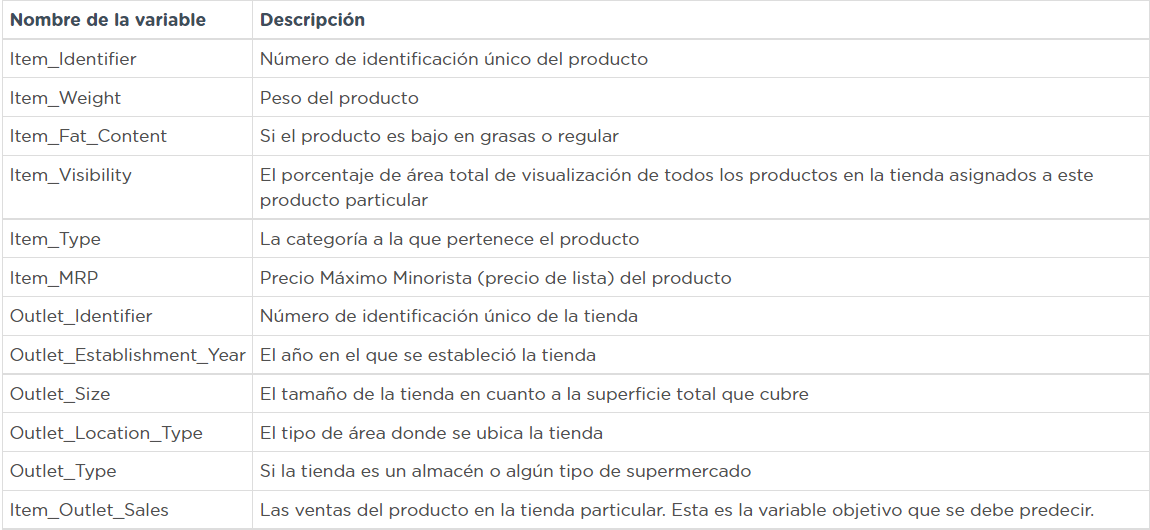

In [25]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Análisis del tipo de tienda que más vende:**

In [26]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [27]:
ventas_type_store= df1.groupby(by='Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending= False)
ventas_type_store

Outlet_Type
Supermarket Type1    1.291734e+07
Supermarket Type3    3.444468e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.679138e+05
Name: Item_Outlet_Sales, dtype: float64

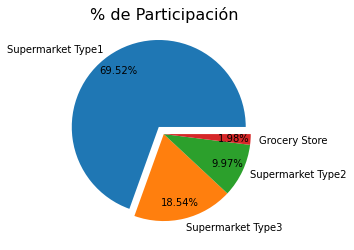

In [28]:
destacar= [0.1, 0, 0, 0]
plt.pie(ventas_type_store.values, labels= ventas_type_store.index, autopct="%.2f%%", pctdistance= 0.8, explode= destacar);
plt.title('% de Participación', fontsize = 16);

  Las tiendas que participan más en ventas son las tiendas clasificadas como Supermarket Type1.

**Análisis de ventas con respecto al tipo de producto.**



In [29]:
ventas_itemtype =df1.groupby(by='Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending= False)
ventas_itemtype

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.728352e+06
Household                2.055494e+06
Frozen Foods             1.824165e+06
Dairy                    1.519141e+06
Canned                   1.444151e+06
Baking Goods             1.265405e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


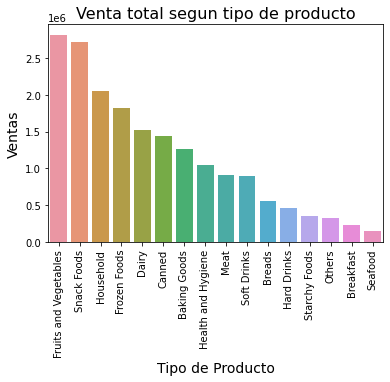

In [30]:
sns.barplot(ventas_itemtype.index, ventas_itemtype.values);
plt.title('Venta total segun tipo de producto', fontsize = 16);
plt.xticks(rotation =90);
plt.xlabel('Tipo de Producto', fontsize = 14);
plt.ylabel('Ventas', fontsize = 14);

Este grafico nos muestra cuales son los tipos de productos más vendidas, considerando al informaciones todas las tiendas.

**Análisis de Supermarket Type1:** Considerando que los Supermarket Type1 son los con mayor venta, analizaremos la venta de los productos regulares y bajo en grasas de esta categoría de tienda.

Crearemos una columna con las cantidades vendidas por tienda 

In [31]:
df1['sold_units'] = df1['Item_Outlet_Sales'].values / df1['Item_MRP'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
#Filtros:
Super1 = df1['Outlet_Type'] =='Supermarket Type1'
Super2 = df1['Outlet_Type'] =='Supermarket Type2'
Super3 = df1['Outlet_Type'] =='Supermarket Type3'
Grocery = df1['Outlet_Type'] =='Grocery Store'

Low_Fat = df1['Item_Fat_Content']=='Low Fat'

In [33]:
Low_super1= df1.loc[Super1 & Low_Fat,:].groupby(['Item_Identifier'])['sold_units'].mean().sort_values(ascending= False).head(10)
Reg_super1= df1.loc[Super1 & ~Low_Fat,:].groupby(by= 'Item_Identifier')['sold_units'].mean().sort_values(ascending= False).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

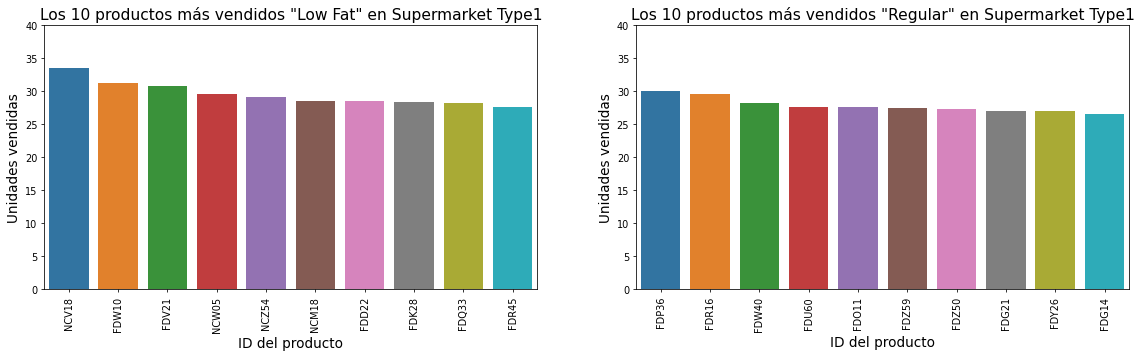

In [43]:
fig = plt.figure(figsize=(20,5), dpi=70)
#Subplot 1
plt.subplot(1, 2, 1);
sns.barplot(Low_super1.index, Low_super1.values);
plt.title('Los 10 productos más vendidos "Low Fat" en Supermarket Type1', fontsize = 16);
plt.xticks(rotation =90);
plt.xlabel('ID del producto', fontsize = 14);
plt.ylabel('Unidades vendidas', fontsize = 14);
plt.ylim(bottom=0,top=40)
#Subplot 2
plt.subplot(1, 2, 2);
sns.barplot(Reg_super1.index, Reg_super1.values);
plt.title('Los 10 productos más vendidos "Regular" en Supermarket Type1', fontsize = 16);
plt.xticks(rotation =90);
plt.xlabel('ID del producto', fontsize = 14);
plt.ylabel('Unidades vendidas', fontsize = 14);
plt.ylim(bottom=0,top=40)

Este grafico nos muestra los 10 productos más vendidas, en la categoría Low Fat y Regular, en un Supermarket Type1.